# 1. Introduction & Guiding Questions

**Purpose:** Explore the Walkability Index to understand the factors that contribute to walkable communities in the United States.

**Dataset:** U.S. Environmental Protection Agency’s Walkability Index (sample of 100 records is 100count.csv).

**Guiding Questions:**
1. What is the distribution of the National Walkability Index across the sample?
2. Are there correlations between population density and walkability?
3. How do different design and diversity metrics relate to walkability?


In [ ]:
# 2.1 Load Data
import pandas as pd

df = pd.read_csv("100count.csv")
# df = pd.read_csv("EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")
df.head()


,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [9]:
# 2.2 Initial Inspection
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Columns: 117 entries, OBJECTID to Shape_Area
dtypes: float64(73), int64(42), object(2)
memory usage: 197.0+ MB


,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [10]:
# 2.3 Check for Missing or Duplicated Data
df.isnull().sum().sort_values(ascending=False).head(10)
df.duplicated().sum()


0

In [11]:
# 2.4 Feature Cleaning or Engineering
df['Walkability_Level'] = pd.cut(df['NatWalkInd'],
                                  bins=[0, 5, 10, 20],
                                  labels=['Low', 'Medium', 'High'])

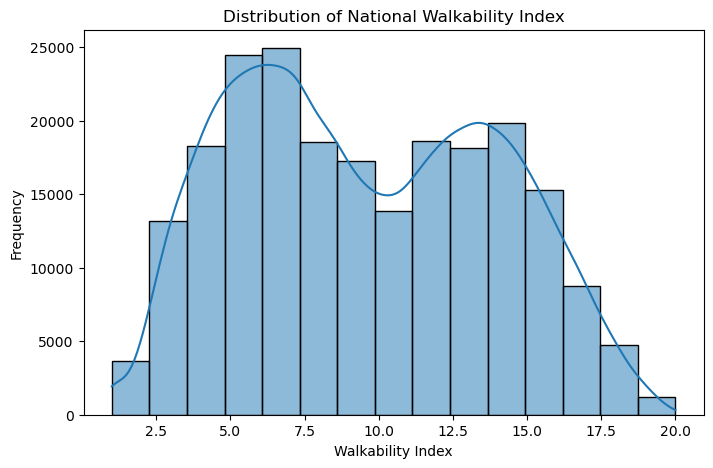

In [12]:
# 3.1 Distribution of Walkability
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['NatWalkInd'], kde=True, bins=15)
plt.title("Distribution of National Walkability Index")
plt.xlabel("Walkability Index")
plt.ylabel("Frequency")
plt.show()


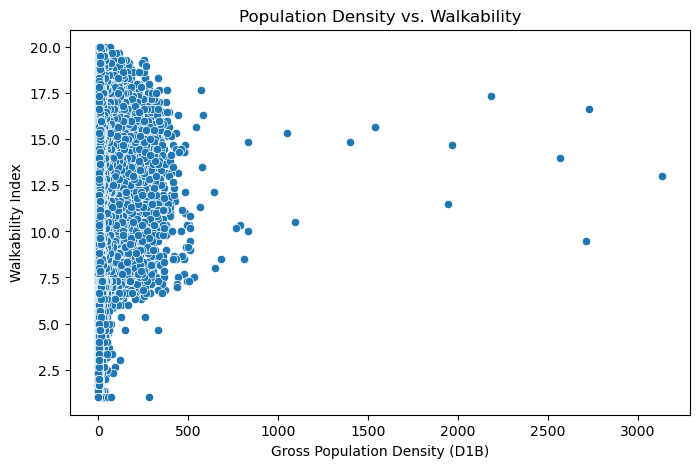

In [14]:
# 3.2 Population Density vs Walkability
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='D1B', y='NatWalkInd')
plt.title("Population Density vs. Walkability")
plt.xlabel("Gross Population Density (D1B)")
plt.ylabel("Walkability Index")
plt.show()


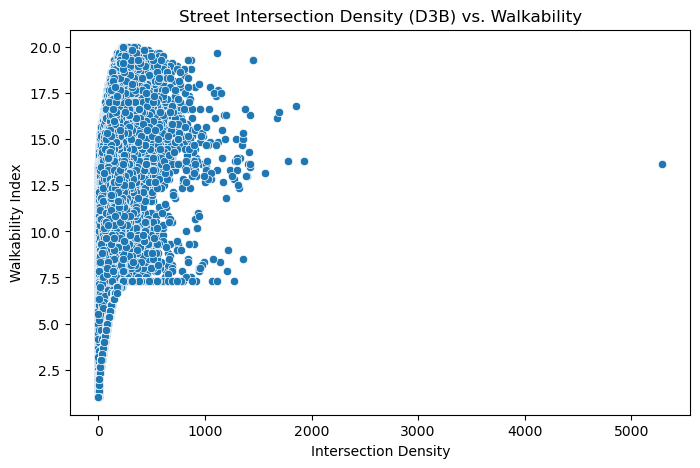

In [13]:
# 3.3 Design Metrics vs Walkability
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='D3B', y='NatWalkInd')
plt.title("Street Intersection Density (D3B) vs. Walkability")
plt.xlabel("Intersection Density")
plt.ylabel("Walkability Index")
plt.show()


# 4. Assumptions & Limitations

- The data includes only a few census block groups and may not generalize.
- Some variables may be outdated or not standardized across regions.


# 5. Conclusion

- The walkability index is roughly normally distributed in this sample.
- Higher population density and street intersection density are positively correlated with higher walkability.
- More walkable areas tend to have a mix of accessibility and compact design.

Further research could include mapping this data geographically or expanding to the full dataset.
